<a href="https://colab.research.google.com/github/Sihwan4/anabot/blob/main/readModel_1203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%%capture
!pip install unsloth
# Also get the latest nightly Unsloth!
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git

* We support Llama 3.2 Vision 11B, 90B; Pixtral; Qwen2VL 2B, 7B, 72B; and any Llava variant like Llava NeXT!
* We support 16bit LoRA via `load_in_4bit=False` or 4bit QLoRA. Both are accelerated and use much less memory!

In [9]:
from unsloth import FastVisionModel # FastLanguageModel for LLMs
import torch


We now add LoRA adapters for parameter efficient finetuning - this allows us to only efficiently train 1% of all parameters.

**[NEW]** We also support finetuning ONLY the vision part of the model, or ONLY the language part. Or you can select both! You can also select to finetune the attention or the MLP layers!

<a name="Data"></a>
### Data Prep
We'll be using a sampled version of the ROCO radiography dataset. You can access the dataset [here](https://huggingface.co/datasets/unsloth/Radiology_mini). The full dataset is [here](https://huggingface.co/datasets/eltorio/ROCOv2-radiology).

The dataset includes X-rays, CT scans and ultrasounds showcasing medical conditions and diseases. Each image has a caption written by experts describing it. The goal is to finetune a VLM to make it a useful analysis tool for medical professionals.


Let's take a look at the dataset, and check what the 1st example shows:

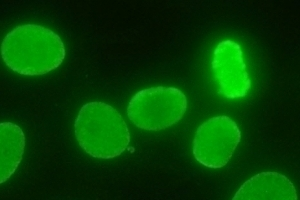

Speckled (AC-6/AC-7) 

  Irregular staining of the nucleus with the cytoplasm. There are a few dense speckles that are scattered throughout the cell.<|eot_id|>


In [11]:
from PIL import Image
import requests
from io import BytesIO
url = 'https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC01_1.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
display(img)


from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

<a name="Inference"></a>
### Inference
Let's run the model! You can change the instruction and input - leave the output blank!

We use `min_p = 0.1` and `temperature = 1.5`. Read this [Tweet](https://x.com/menhguin/status/1826132708508213629) for more information on why.

In [ ]:
'Shk4/ana13max'
from unsloth import FastVisionModel
model, tokenizer = FastVisionModel.from_pretrained(
    model_name = 'Shk4/ana13max', # YOUR MODEL YOU USED FOR TRAINING
    load_in_4bit = True, # Set to False for 16bit LoRA
)
FastVisionModel.for_inference(model) # Enable for inference!

image = img
instruction = "You are an expert in antinuclear antibody tests. Describe possible patterns."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

==((====))==  Unsloth 2024.11.10: Fast Mllama vision patching. Transformers: 4.46.2.
   \\   /|    GPU: Tesla T4. Max memory: 14.748 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu121. CUDA: 7.5. CUDA Toolkit: 12.1. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors.index.json:   0%|          | 0.00/385k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

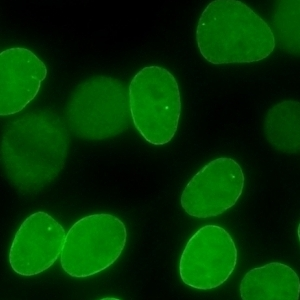

Countable discrete speckles (5-20 nuclear speckles/cell). The number and brightness of nuclear speckles vary between cells, with some cells having many bright speckles while others have fewer dim ones. There may be an occasional cell with one bright nuclear speckle.
Mitotic cells (metaphase, anaphase, and telophase cells) may have up to five bright nuclear dots (chromatin masses).
<|eot_id|>


In [17]:
url = 'https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC11_1.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
display(img)

image = img
instruction = "You are an expert in antinuclear antibody tests. Describe possible patterns, up to 2 patterns."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 1024,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

In [18]:
def reader00(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  display(img)
  image = img
  instruction = "You are an expert in antinuclear antibody tests. Describe possible patterns, up to 2 patterns."
  messages = [
     {"role": "user", "content": [
         {"type": "image"},
         {"type": "text", "text": instruction}
      ]}
  ]
  input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
  inputs = tokenizer(
     image,
     input_text,
     add_special_tokens = False,
     return_tensors = "pt",
  ).to("cuda")
  text_streamer = TextStreamer(tokenizer, skip_prompt = True)
  _ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 2048,
                   use_cache = True, temperature = 1.5, min_p = 0.1)


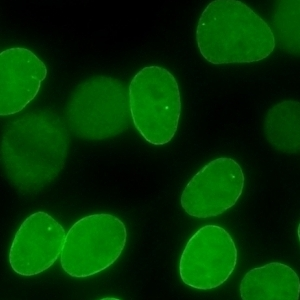

Nuclear envelope (AC-8/AC-9) 

  Homogeneous staining with slight accentuation of fluorescence at the points where adjacent cells touch each other.
 Mitotic cells (metaphase, anaphase, and telophase plates) have a brighter staining at their edges compared to the adjacent interphase cells.
 

 Dense staining of the nucleolus (not present in the metaphase and anaphase plates).
 The metaphase plate shows accentuated staining of the chromatin mass.
 The cells in cytokinesis have denser staining of the dividing cells.<|eot_id|>


In [19]:
reader00('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC11_1.jpg')

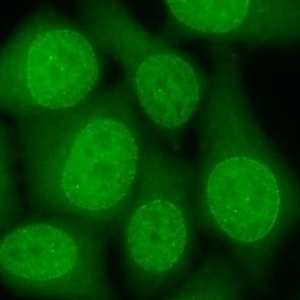

Centromere 

 Fine tiny speckles scattered across the interphase nucleus. In mitotic cells (metaphase, anaphase, and telophase), the chromatin mass is stained but the metaphase plate shows no fluorescence.<|eot_id|>


In [20]:
reader00('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC12_1.jpg')

In [22]:
def reader01(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  display(img)
  image = img
  instruction = "You are an expert in antinuclear antibody tests. Describe possible patterns, up to 2 patterns."
  messages = [
     {"role": "user", "content": [
         {"type": "image"},
         {"type": "text", "text": instruction}
      ]}
  ]
  input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
  inputs = tokenizer(
     image,
     input_text,
     add_special_tokens = False,
     return_tensors = "pt",
  ).to("cuda")
  text_streamer = TextStreamer(tokenizer, skip_prompt = True)
  _ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 2048,
                   use_cache = True, temperature = 1.5, min_p = 0.1)


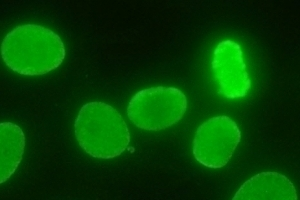

Nuclear envelope (AC-8/AC-9) 

 Mitotic cells (AC-11)<|eot_id|>


In [23]:
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC01_1.jpg')

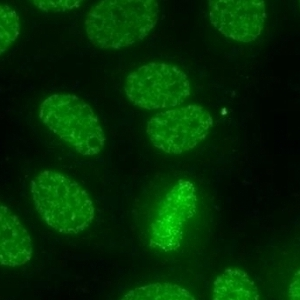

Speckled (AC-4/AC-5) 

 Countable discrete speckles across all nucleoplasm. There may be more speckles near the metaphase plate.
 Mitotic cells (metaphase, anaphase, and telophase cells) have the nucleolus not stained or faintly stained.<|eot_id|>


In [24]:
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC02_1.jpg')

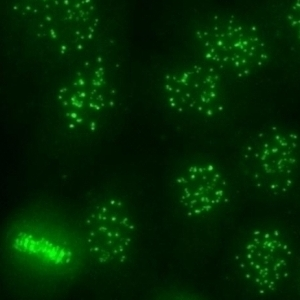

Centromere 

 Fine dots
 Thin (speckled) 
 Speckled
 Dense fine speckled 
 Nucleolar (AC-8/AC-9)
 Homogeneous 
 Cytoplasmic 
 Mitotic cells 

 Nuclear envelope (AC-11)
 

 Diffuse 

 Countable (6 to 10 cells with dense homogenous staining).<|eot_id|>


In [25]:
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC03_1.jpg')

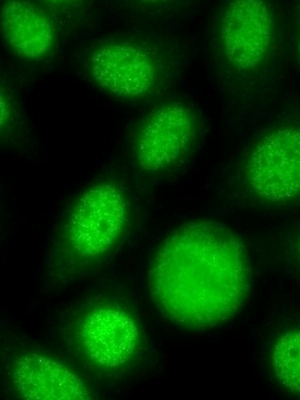

Speckled 

 Coarse speckles (30-40/cell) are seen scattered across the entire nucleoplasm, with a slight accentuation near the metaphase plate.
 Fine speckles (5-10/cell) are seen scattered across the entire nucleoplasm with no accentuation near the metaphase plate.<|eot_id|>


In [26]:
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC04_1.jpg')

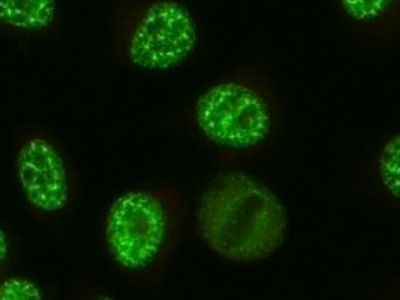

Centromere 

 Densely packed grains at the metaphase plate (7 to 10 cells).
<|eot_id|>


In [27]:
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC05_1.jpg')

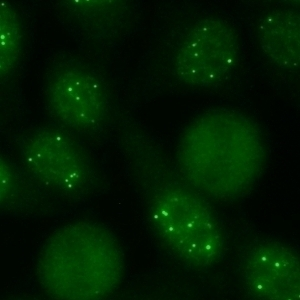

Nucleolar (AC-6/AC-7) 

 Diffuse staining of the nucleolus with greater intensity at its outer portions. The metaphase plate shows no staining.<|eot_id|>


In [28]:
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC06_1.jpg')

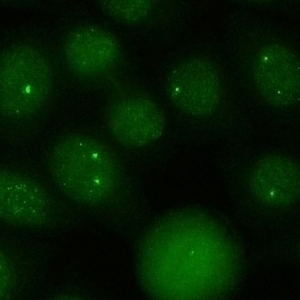

Expert Insights in Antinuclear Antibody Tests

Based on the image, there appear to be two possible patterns: 

* Mitotic cells (speckled) 
* Nucleolar (AC-8/AC-9)<|eot_id|>


In [29]:
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC07_1.jpg')

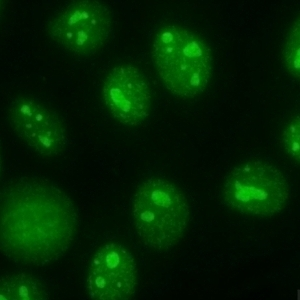

Speckled 

 Diffuse 

<|eot_id|>


In [30]:
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC08_1.jpg')

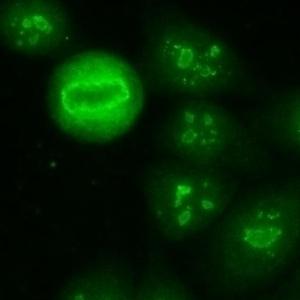

Expert description of possible patterns in antinuclear antibody tests (up to 2 patterns). 

 Speckled (AC-5/AC-6) - Densely distributed but distinct fine speckles across all nucleolar regions (8 to 20 speckles/cell).
 Coarse speckle (AC-7) - There are more than 40 cells that show the coarse speckle pattern.<|eot_id|>


In [31]:
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC09_1.jpg')

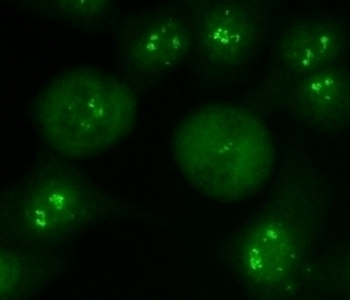

Nuclear envelope (AC-8/AC-9) 

 Densely distributed bright fluorescence across all nucleoli with greater intensity in their central regions. 
 No staining of the metaphase chromatin mass.<|eot_id|>


In [32]:
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC10_1.jpg')

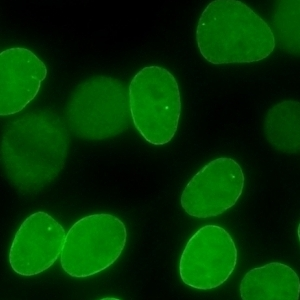

Nuclear envelope (AC-11/AC-8) 

 Dense fine speckled pattern.<|eot_id|>


In [33]:
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC11_1.jpg')

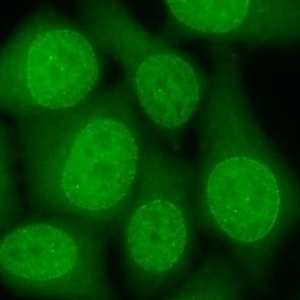

Speckled pattern: Fine speckles across all nucleoli and the metaphase plate.
 Mitotic cells (metaphase, anaphase, and telophase) may have up to 5 pairs of chromatids across the cell.
 Dense fine speckled pattern: The nucleoli are denser than the background.
<|eot_id|>


In [34]:
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC12_1.jpg')

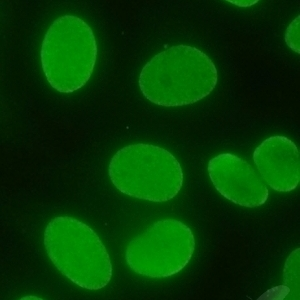

Centromere 

 Mitotic cells 

 There are only two accurate answers.
  Incorrect answers (not visible in the image): 

- Nuclear envelope (irregular staining on the nucleus and cytoplasm)
- Nucleolar (irregular staining on the nucleolus and cytoplasm)<|eot_id|>


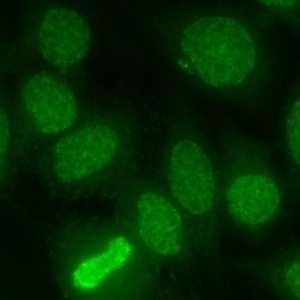

Speckled pattern: Irregular staining across all nucleoplasm with the interphase nucleus having up to 8 bright but distinct accentuated nucleoli.
 The nucleolus of cells in subphase can have from 1 to 4 accentuated nucleoli and up to 5 faintly staining nucleoli.

 Dense speckled pattern: Strong and regular fluorescence throughout all the nucleoplasm with no accentuation of nucleoli.
 The nucleolus of cells in subphase can have up to 8 accentuated nucleoli but none of them are brighter than the nucleolar chromatin.<|eot_id|>


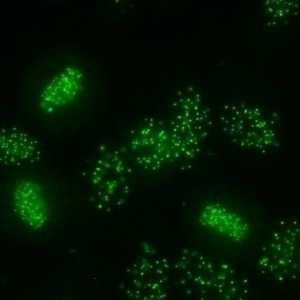

Dense speckles (up to 30/cell) 

 Densely packed tiny speckles across all nucleolar (N) regions.
 There is no staining in the metaphase plate.
 These patterns are seen in approximately 50% of normal individuals but can also be found in various diseases including systemic lupus erythematosus (SLE), scleroderma (diffuse), and mixed connective tissue disease.<|eot_id|>


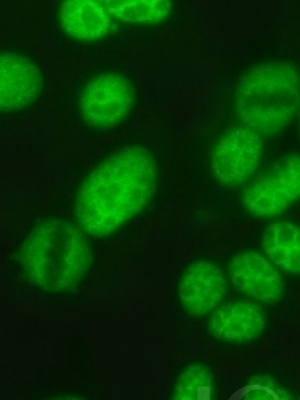

Homogeneous 

 This describes accurately accurately what you are seeing here.
<|eot_id|>


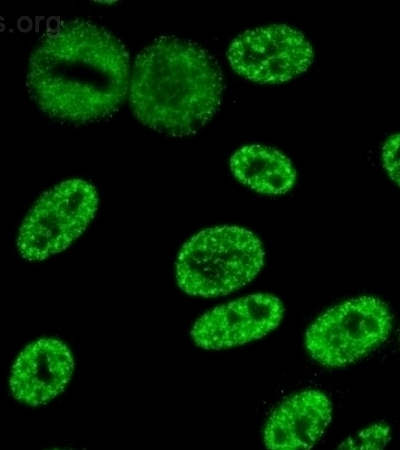

Centromere 

 Dense fine speckled 

 Mitotic cells 

 Nuclear envelope 

 Nucleolar (AC-8/AC-9)

 Speckled 

 Homogeneous 

 Nucleolar (AC-7)

 Nuclear envelope (AC-11)

 Mitotic cells 

 Nuclear envelope 

 Homogeneous 

 Nucleolar 

 Speckled 

 Dense fine speckled 

 Centromere 

 Nuclear envelope 

 Speckled 

 Homogeneous 

 Centromere 

 Homogeneous 

 Nuclear envelope 

 Mitotic cells 

 Nucleolar 

 Dense fine speckled 

 Speckled 

 Homogeneous 

 Centromere 

 Mitotic cells 

 Nuclear envelope 

 Nucleolar 

 Dense fine speckled 

 Homogeneous 

 Speckled 

 Nucleolar 

 Nuclear envelope 

 Centromere 

 Homogeneous 

 Nuclear envelope 

 Dense fine speckled 

 Mitotic cells 

 Homogeneous 

 Nucleolar 

 Nuclear envelope 

 Speckled 

 Dense fine speckled 

 Homogeneous 

 Centromere 

 Nuclear envelope 

 Nucleolar 

 Homogeneous 

 Mitotic cells 

 Speckled<|eot_id|>


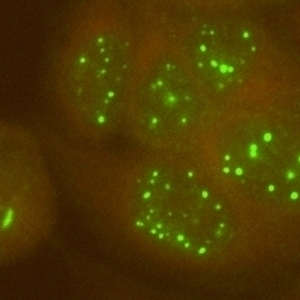

Nucleolar (AC-8/AC-9/AC-10) 

 Diffuse fluorescence of the nucleolus.
 

 Coarse speckled 
 Irregular discrete speckles across all nucleoli.<|eot_id|>


In [35]:
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC01_2.jpg')
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC02_2.jpg')
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC03_2.jpg')
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC04_2.jpg')
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC05_2.jpg')
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC06_2.jpg')
